In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(10698, 2)

In [3]:
df.head()

,Time,domain
0,2022-02-12 21:47:22,www.google.com
1,2022-02-12 21:49:58,mybinder.org
2,2022-02-12 21:50:08,www.google.com
3,2022-02-12 21:50:39,www.google.com
4,2022-02-12 21:52:10,www.google.com


In [4]:
df.tail()

,Time,domain
10693,2022-04-19 22:53:59,grad.depaul.edu
10694,2022-04-19 22:54:21,grad.depaul.edu
10695,2022-04-19 22:54:28,grad.depaul.edu
10696,2022-04-19 22:55:31,mail.google.com
10697,2022-04-19 22:56:09,mail.google.com


In [5]:
df.isna().sum()

Time      0
domain    0
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

0

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2022-02-12 21:47:22,www.google.com
1,2022-02-12 21:49:58,mybinder.org
2,2022-02-12 21:50:08,www.google.com
3,2022-02-12 21:50:39,www.google.com
4,2022-02-12 21:52:10,www.google.com


In [14]:
df['domain'].value_counts()[:50]

colab.research.google.com        3498
github.com                       1429
www.google.com                   1375
webauth.umbc.edu                  740
blackboard.umbc.edu               316
my.umbc.edu                       215
onedrive.live.com                 208
umbc-csm.symplicity.com           170
us.shein.com                      108
mail.google.com                   107
www.primevideo.com                 87
www.paraphraser.io                 80
www.netflix.com                    70
app.grammarly.com                  62
www.slu.edu                        60
www.office.com                     60
www.instagram.com                  57
myretrievercare.umbc.edu           55
gradadmissions.stevens.edu         55
www.applyweb.com                   55
csprd-web.ps.umbc.edu              53
web.whatsapp.com                   53
www.myntra.com                     47
www.linkstricks.com                46
www.amazon.com                     42
my3.my.umbc.edu                    42
www.youtube.

<AxesSubplot:>

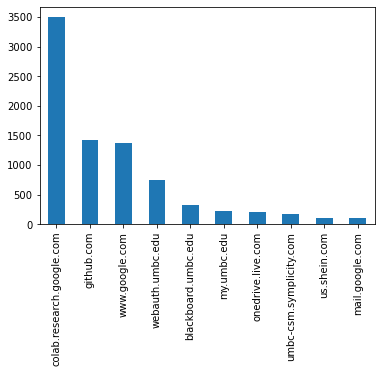

In [15]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [16]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0      378
1      359
2      145
3      126
4       93
5        3
6        1
8       12
9        8
10     165
11     442
12     582
13     422
14     814
15    1000
16     473
17     680
18     717
19    1021
20     893
21     884
22     598
23     882
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

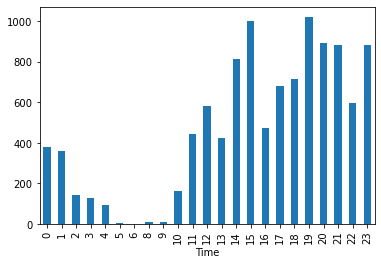

In [17]:
hourly_counts.plot.bar()

In [18]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2022-02-12 21:47:22,www.google.com,Saturday,5
1,2022-02-12 21:49:58,mybinder.org,Saturday,5
2,2022-02-12 21:50:08,www.google.com,Saturday,5
3,2022-02-12 21:50:39,www.google.com,Saturday,5
4,2022-02-12 21:52:10,www.google.com,Saturday,5


In [19]:
df['Day'].value_counts()

Saturday     3248
Monday       1616
Wednesday    1365
Friday       1338
Tuesday      1209
Thursday     1180
Sunday        742
Name: Day, dtype: int64

In [20]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1616
1    1209
2    1365
3    1180
4    1338
5    3248
6     742
Name: DayIndex, dtype: int64

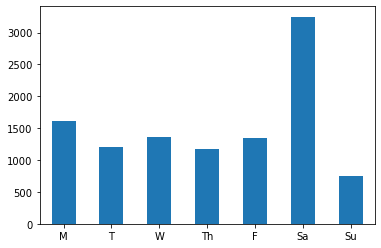

In [21]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [22]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-02-12 21:47:22,www.google.com,Saturday,5,True
1,2022-02-12 21:49:58,mybinder.org,Saturday,5,True
2,2022-02-12 21:50:08,www.google.com,Saturday,5,True
3,2022-02-12 21:50:39,www.google.com,Saturday,5,True
4,2022-02-12 21:52:10,www.google.com,Saturday,5,True


In [23]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [24]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
0,2022-02-12 21:47:22,www.google.com,Saturday,5,True
1,2022-02-12 21:49:58,mybinder.org,Saturday,5,True
2,2022-02-12 21:50:08,www.google.com,Saturday,5,True
3,2022-02-12 21:50:39,www.google.com,Saturday,5,True
4,2022-02-12 21:52:10,www.google.com,Saturday,5,True


In [25]:
weekday['domain'].value_counts()[:5]

github.com                   1120
www.google.com               1064
colab.research.google.com    1011
webauth.umbc.edu              589
blackboard.umbc.edu           217
Name: domain, dtype: int64

In [26]:
weekend['domain'].value_counts()[:5]

colab.research.google.com    2487
www.google.com                311
github.com                    309
webauth.umbc.edu              151
blackboard.umbc.edu            99
Name: domain, dtype: int64

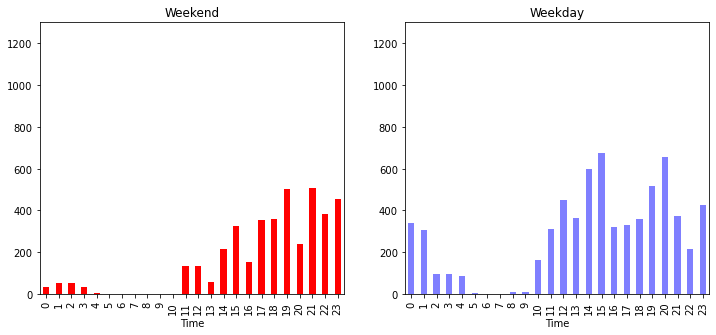

In [27]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [28]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

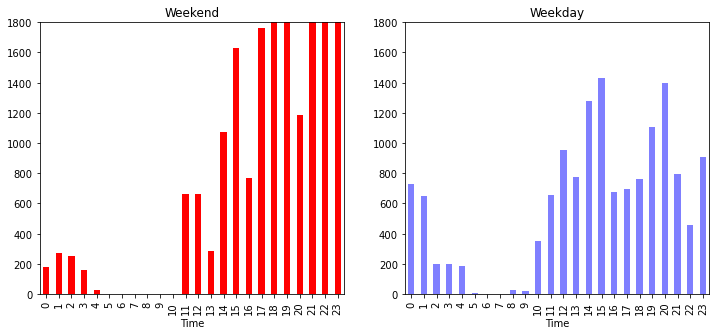

In [29]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [30]:
df['domain'].value_counts()[:10]

colab.research.google.com    3498
github.com                   1429
www.google.com               1375
webauth.umbc.edu              740
blackboard.umbc.edu           316
my.umbc.edu                   215
onedrive.live.com             208
umbc-csm.symplicity.com       170
us.shein.com                  108
mail.google.com               107
Name: domain, dtype: int64

In [31]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [32]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

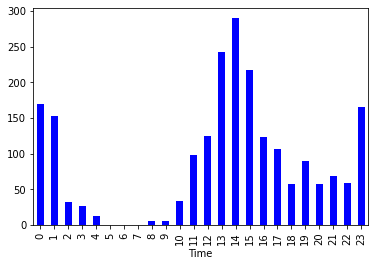

In [37]:
_= show_domain_stats('www.google.com', 'blue')

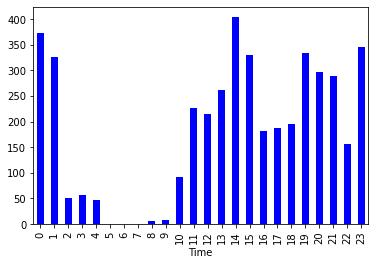

In [38]:
_= show_domain_stats('www.google.com|myumbc.edu|github.com', 'blue')

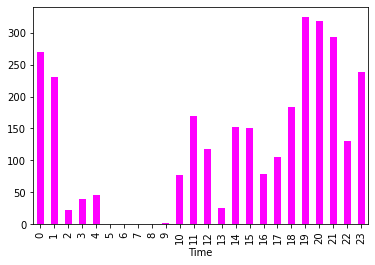

In [39]:
_ = show_domain_stats('github.com', 'magenta')


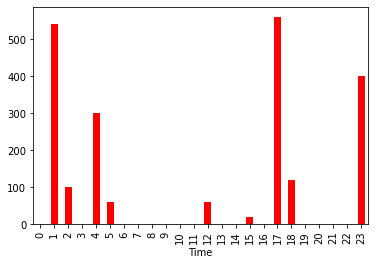

In [42]:
_ = show_domain_stats('us.shein.com', 'red')

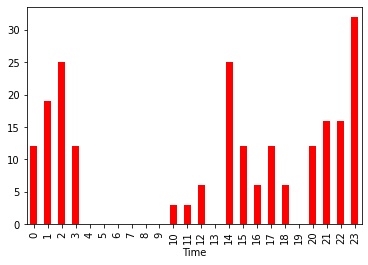

In [43]:
_ = show_domain_stats('netflix', 'red')

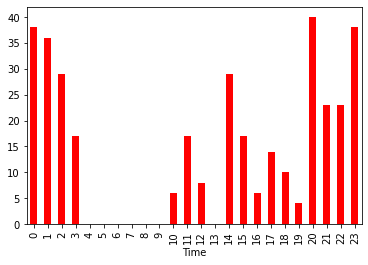

In [44]:
_ = show_domain_stats('netflix|disney|prime', 'red')

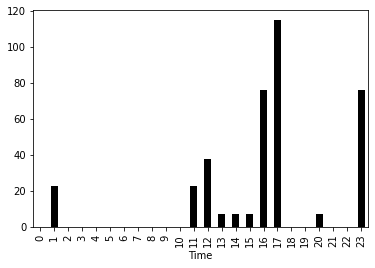

In [45]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here

1. It is a personal computer.

2. No, the person using this computer isn't employed. They might be a student as the history is mostly related to it.

3. This person is interested in shopping, watching movies most of the time. 

4. The interesting thing about this person is that they are mostly browsing the information regarding universities which shows that they are willing to get into a university for their education. He/She are mostly on their computer during the weekends and during the late hours. 